# POSTGRADUATE PRICES

# 1- Create and wrangling data

## 1- Import libraries

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 2- Create and export a DataFrame

In [46]:
posgrados= {

    'UNIVERSIDAD':['UNAD',
                   'CUN',
                   'UNIMINUTO'],
    'ESPECIALIZACION':['CIENCIA DE DATOS Y ANALITICA',
                       'ANALITICA DE DATOS', 
                       'BIG DATA'],
    'MODALIDAD':['VIRTUAL',
                 'VIRTUAL',
                 'PRESENCIAL'],
    'PRECIO SEMESTRAL':[4557000,5932500,8224900],
    'DESCUENTO':['SI','NO','NO'],
    'PORCENTAJE':[25,0,0],
    'CERTIFICACIONES':['SI','NO','NO'],
    'COSTO CERTIFICACIONES':['GRATIS','NO OFRECEN','NO OFRECEN'],
    'FUENTE_CONSULTA':['https://estudios.unad.edu.co/plan-de-estudios-especializacion-en-ciencia-de-datos-y-analitica#openmodal', 
                       'https://cun.edu.co/posgrados/especializacion-en-analitica-de-datos',
                       'https://www.uniminuto.edu/oferta-academica/especializacion-en-big-data/especializacion-en-big-data'],
    'OBSERVACIONES':['NO APLICA','NO APLICA','NO APLICA'],

            }

data=pd.DataFrame(posgrados)
print(data)

data.to_csv('C:/Users/WAGNER FERNÁNDEZ/Downloads/ANALISIS-POSGRADO-CIENCIA-DATOS/outputs/analysis.csv')


  UNIVERSIDAD               ESPECIALIZACION   MODALIDAD  PRECIO SEMESTRAL  \
0        UNAD  CIENCIA DE DATOS Y ANALITICA     VIRTUAL           4557000   
1         CUN            ANALITICA DE DATOS     VIRTUAL           5932500   
2   UNIMINUTO                      BIG DATA  PRESENCIAL           8224900   

  DESCUENTO  PORCENTAJE CERTIFICACIONES COSTO CERTIFICACIONES  \
0        SI          25              SI                GRATIS   
1        NO           0              NO            NO OFRECEN   
2        NO           0              NO            NO OFRECEN   

                                     FUENTE_CONSULTA OBSERVACIONES  
0  https://estudios.unad.edu.co/plan-de-estudios-...     NO APLICA  
1  https://cun.edu.co/posgrados/especializacion-e...     NO APLICA  
2  https://www.uniminuto.edu/oferta-academica/esp...     NO APLICA  


## 3- Check DataFrame

In [47]:
data.describe()

,PRECIO SEMESTRAL,PORCENTAJE
count,3.000000e+00,3.000000
mean,6.238133e+06,8.333333
std,1.852952e+06,14.433757
min,4.557000e+06,0.000000
25%,5.244750e+06,0.000000
50%,5.932500e+06,0.000000
75%,7.078700e+06,12.500000
max,8.224900e+06,25.000000


# 2 - Visualizations

## 1- Barplot with Matplotlib

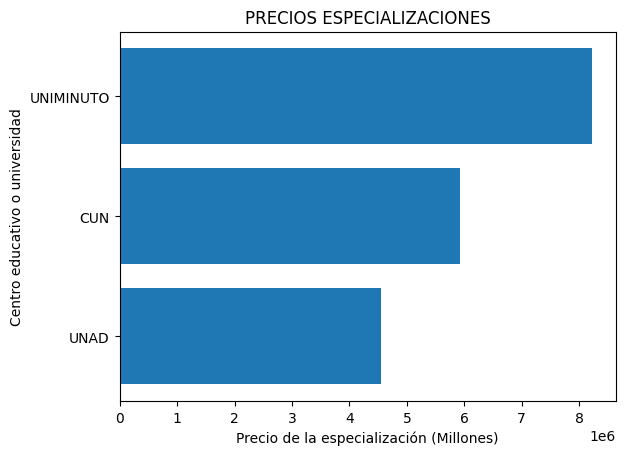

In [48]:
plt.barh( data['UNIVERSIDAD'],data['PRECIO SEMESTRAL'])
plt.xlabel('Precio de la especialización (Millones)')
plt.ylabel('Centro educativo o universidad')
plt.title('PRECIOS ESPECIALIZACIONES')
plt.savefig('C:/Users/WAGNER FERNÁNDEZ/Downloads/ANALISIS-POSGRADO-CIENCIA-DATOS/reports/barhplot.jpg')
plt.show()

## 2- Pairplot with Seaborn

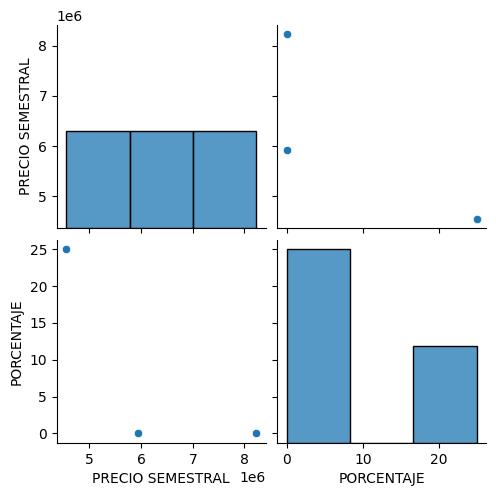

In [52]:
sns.pairplot(data)

## 3- Histogram with Seaborn

<Axes: ylabel='Count'>

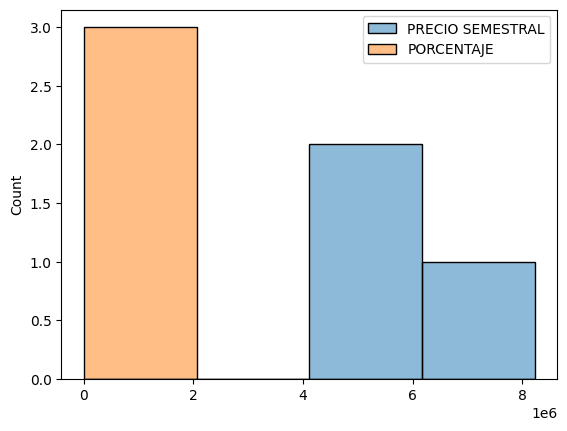

In [50]:
sns.histplot(data)

## 4- Barplot with Plotly

In [51]:
fig = px.bar(data, x ='UNIVERSIDAD', y = 'PRECIO SEMESTRAL', color='UNIVERSIDAD',title= 'PRECIOS SEMESTRAL ESPECIALIZACIONES')
fig.update_layout(title_x=0.5)
fig.show()

# 3- Conclusions

1. UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD

- Ofrecen el programa de forma virtual.
- Es más viable estudiar en la UNAD, por que ofrece una forma economica de pagar la matrícula - (descuento y convenios)
- En la ciudad donde estoy viviendo actualmente (Florencia - Caquetá), tiene un Centro de Servicios donde se puede interactuar con estudiantes, docentes y personal administrativo.
- El sistema de inscripción y tramitología se ve facil, pero es tedioso en el sentido que hay tendencias a la desinformación, por eso es bueno acudir a los CEADs.
- Se nota que hay docentes muy bienn preparados.
- Policías activos y en su de buen retiro, dan buenas referencias de la universidad, calidad humana de los profesores, que incluso el suscrito evidenció el día 17/02/2024.
- Hacen un analisis de los perfiles, preparación académica y trayectoria laboral de los aspirantes.
- Ofrecen lineas de profundización.
- Con posibilidad de obtener certificaciones de empresas tecnólogicas.

2. CUN

- Ofrecen el programa de forma virtual.
- La matricula se excede del presupuesto proyectado. 
- No ofrecen descuentos por convenios.
- No conestaron el teléfono para que ampliaran la información de lo que  ofertan.
- En la ciudad donde estoy viviendo actualmente (Florencia - Caquetá), tiene un Centro de Servicios donde se puede interactuar con estudiantes, docentes y personal administrativo.
- No ofrecen lineas de profundización.
- Sin posibilidad de obtener certificaciones de empresas tecnólogicas.

3. UNIMINUTO

- No ofrecen el programa de forma virtual, sino presencial.
- La matricula se excede del presupuesto proyectado, es la más cara dentro del análisis. 
- No ofrecen descuentos por convenios.
- En la ciudad donde estoy viviendo actualmente (Florencia - Caquetá), no tiene un Centro de Servicios donde se pueda interactuar con estudiantes, docentes y personal administrativo.
- No ofrecen lineas de profundización.
- Sin posibilidad de obtener certificaciones de empresas tecnólogicas.
